<a href="https://colab.research.google.com/github/Funatlearn/langgraph101/blob/main/5_looping_Agents_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fourth agent, to demonstrates conditional agent
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 9.0 MB/s eta 0:00:00


In [2]:

from typing import TypedDict, List # use list, typeddict for state
from langgraph.graph import StateGraph, START, END # graph
import math
import random

In [3]:
# This is State, shared data structure that keeps track of information as application runs.
class State(TypedDict):
  name: str
  number: List[int]
  counter: int

def greeting_node(state: State) -> State:
  """Greeting node which says hi to the person"""
  state["name"] = f"Hi there, {state['name']}"
  state["counter"] = 0
  return state

def random_node(state: State) -> State:
  """Generates a random number from 0 to 10"""
  state["number"].append(random.randint(0, 10))
  state["counter"] += 1
  return state

def should_continue(state: State) -> State:
  """Function to decide what to do next"""
  if state["counter"] < 5:
    print("ENTERING LOOP", state['counter'])
    return "loop"
  else:
    return "exit"






In [5]:
graph = StateGraph(State)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges("random", # source for condition
                            should_continue,
 {
     "loop": "random", # self loop
     "exit": END # exit
 } )

graph.set_entry_point("greeting")
app = graph.compile()

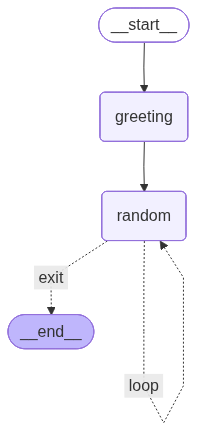

In [6]:
# display graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
# Invoke graph
initial_state_1 = app.invoke({"name": "Sachin", "number": [], "number2":3})
#state = State(number1=10, operation="-", number2=3)
#initial_state_1 = app.invoke(state)
print(initial_state_1)


ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4
{'name': 'Hi there, Sachin', 'number': [4, 1, 3, 2, 8], 'counter': 5}
